# Cadenas de Markov

## Profesor: Doctor Simón Lunagómez

## Darío Sotelo
## Mateo Guajardo


### Introducción

Las $ \textit{Cadenas de Markov} $ son un tipo de proceso estocástico. El concepto fue introducido por Andrey Markov en 1906, resultando en algo muy innovador por su peculiar propiedad de pérdida de memoria, pues la cadena a un tiempo fijo $ t_n > 0 $ es independiente de los valores que tome en los $n - 1$ tiempos anteriores. Algunas de sus caracteristicas principales son:
 - Cuenta con estados de transición.
 - La cadena se puede escribir como una matriz de transición.
 - Pueden tener finitos o infinitos estados, aunque nosotros nos limitaremos al análisis de las cadenas finitas.
 - Perdida de memoria. 

### Definiciones

- $ \textit{Espacio de estados:} $ se refiere a todos los posibles valores que puede tomar $ X_n $ donde $ n $ representa la evolución del proceso a través del tiempo.
- $ \textit{Cadena de Markov:} $ una secuencia de variables aleatorias $ X_0 $, $ X_1 $, $ X_2 $,... tomando valores en el $ \textit{espacio de estados} $ $\{1,2,3,4,...\}$ se llama $ \textit{cadena de Markov} $ si $\forall$ $ n $ > 0, 


$$P(X_{n+1}=j|X_n=i,X_{n-1}=i-1,...,X_0=i_0)=P(X_{n+1}=j|X_n=i).$$

    
- $ \textit{Probabilidad de transición:} $ la cantidad $P(X_{n+1}=j|X_n=i)$ se llama $\textit{probabilidad de transición} $ del estado $ i $ al estado $ j. $
- $ \textit{Propiedad de Markov:} $ dada toda la historia de las variables aleatorias anteriores, $X_n,X_{n-1},...,X_0,$ solo el $\textit{último término}$ $ X_n $ importa para predecir $ X_{n+1}. $
- $ \textit{Matriz de transición:}$ sea $X_0,X_1,X_2...$ una cadena de Markov con espacio de estados $\{1,2,...,M\}$ y sea $q_{ij}=P(X_{n+1}=j|X_n=i)$ la probabilidad de transición del estado $i$ al estado $j.$ Entonces, $Q=(q_{ij})$, la matriz de tamaño $M$$\times$$M$ $Q=(q_{ij})$, se llama la $\textit{matriz de transición}$ de la cadena. $Q$ es una matriz no negativa cuyos renglones suman $1$.
- $\textit{Diagramas:}$ son las representaciones gráficas de las matrices de transición de un estado a otro.

### Matrices de transición y diagramas

Como fue explicado anteriormente de manera breve, las matrices de transición son la representación matricial de una $\textit{cadena de Markov,}$ una característica muy importante de estas matrices es que todos los renglones deben sumar $1.$ Si una $\textit{matriz de transición}$ cumple que sus columnas también sumen $1,$ a esta matriz se le llama $\textit{doblemente estocástica.}$ Además, decimos que una matriz $P=(p_{ij}:i,j\in I)$ es $\textit{estocástica}$ si cada renglón $P=(p_{ij}:j\in I)$ es una distribución. Un par de ejemplos de una matriz de transición (J. R. Norris):

![matriz de transción](matricesDeTransicion.PNG)

En este ejemplo, lo que está a la izquierda son las matrices de transición y los grafos que están a la derecha son sus $\textit{diagramas.}$ Estas son dos formas diferentes de representar la misma una información, una $\textit{cadena de Markov.}$ Los $\textit{diagramas}$ son muy útiles porque permiten ver los nodos como estados y las aristas representan la probabilidad que se tiene de pasar de un estado a otro. En el ejemplo que se mostró anteriormente, podemos ver que la probabilidad de que si estamos en el estado $1$ y queremos ir al estado $2$ $p_{12}$ es $\alpha,$ tenemos también la probabilidad de que la transición sea del estado $1$ al mismo $p_{11}$ es de $1-\alpha$ en este ejemplo no vemos la arista que enseña esta probabilidad de transición, pero asumimos que se encuentra ahí. En el segundo ejemplo, la probabilidad de transición de $p_{11}=p_{13}=0$ esto quiere decir que no hay aristas que van en esas direcciones.

Podemos definir a las $\textit{cadenas de Markov}$ más formalmente de la siguiente manera: decimos que 

1. $X_0$ tiene una distribución $\lambda;$
2. $\forall$ $n\geq$0, condicionada en $X_n=i, X_{n+1}$ tiene una distribución $(p_{ij}:j\in I)$ y es independiente de $X_0,...,X_{n-1.}$


### Intuición detrás de los conceptos y resultados

### Ejemplo 1

- En la siguiente celda, adjunto un código que hace el diagrama de una matriz de transición. Este código toma como parámetros una matriz y regresa un archivo de imágen que representa el diagrama correspondiente.

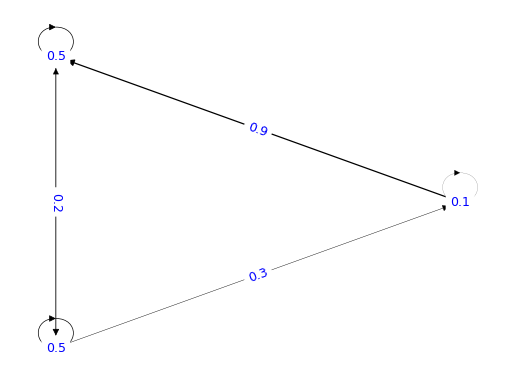

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def diagramaDeMatrizDeTransicion(matriz):
    G = nx.DiGraph()
    filas, columnas = matriz.shape
    etiquetas = {i: str(i) for i in range(filas)}
    G.add_nodes_from(etiquetas.keys())
    for i in range(filas):
        for j in range(columnas):
            peso = matriz[i, j]
            if peso > 0:
                G.add_edge(i, j, weight=peso)
    pos = nx.circular_layout(G)
    nx.draw_networkx_labels(G, pos, labels=etiquetas, font_size=4, font_color='w')
    edges = G.edges()
    peso = [G[u][v]['weight'] for u,v in edges]
    etiquetas = {edge: str(G.edges[edge]['weight']) for edge in G.edges()}
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='black', width=peso)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas, font_size=9, font_color='b')
    plt.axis('off')
    plt.show()
    
    
matriz = np.array([[0.1, 0.9, 0.0],
                   [0.0, 0.5, 0.5],
                   [0.3, 0.2, 0.5]])
    
    
diagramaDeMatrizDeTransicion(matriz)

### Ejemplo 2

- En la siguiente celda, adjunto un código que para cualquier matriz $A \in \mathbb{R}^{nxn}$ se verifica si es una matriz estocastica, y por lo tanto una matriz valida para usar en una Cadena de Markov.

In [6]:
def validacion_matriz_estocastica(matriz):
    #Validar si la matriz es cuadrada:
    if matriz.shape[0] != matriz.shape[1]:
        return False
    
    # Verifica si todos los elementos son no negativos:
    if np.any(matriz < 0):
        return False
    
    # Verifica si cada fila suma a 1:
    sumas_filas = np.sum(matriz, axis = 1)
    if not np.allclose(sumas_filas, 1):
        return False
    
    # Todas las verificaciones pasaron, la matriz es una matriz de transición válida:
    return True



#Pruebas

M1 = np.array([[0.07, 0.15, 0.23, 0.55], 
               [0.73, 0.04, 0.01, 0.22], 
               [0.13, 0.13, 0.51, 0.23], 
               [0.25, 0.25, 0.25, 0.25]])

M2 = np.array([[0.77, 0.25, 0.23, 0.55], 
               [0.173, 0.04, 0.01, 0.0022], 
               [0.13, 0.13, 0.51, 0.23], 
               [0.25, 0.25, 0.25, 0.25]])


V1 = validacion_matriz_estocastica(M1)
V2 = validacion_matriz_estocastica(M2)


print("M1 es matriz estocástica") if V1 else print("M1 no es matriz estocástica")
print("M2 es matriz estocástica") if V2 else print("M2 no es matriz estocástica")



M1 es matriz estocástica
M2 no es matriz estocástica


### Referencias

>Norris, J. R. (1997). *Markov Chains* (2nd ed.). Cambridge University Press.

>Blitzstein, J. K., & Hwang, J. (2015). *Introduction to probability* (2nd ed.). CRC Press.

